In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [39]:
# Import Dataset:
df = pd.read_csv('Mall_Customers.csv')

In [40]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
df.shape  # checking the shape of dataset

(200, 5)

In [42]:
# Info about Dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [43]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [44]:
# checking for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

####  Elbow Curve:

In [45]:
# Select the 'Annual Income & Spending Score'
X = df.iloc[:,3:].values

In [46]:
#Finding no. of clustors....
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

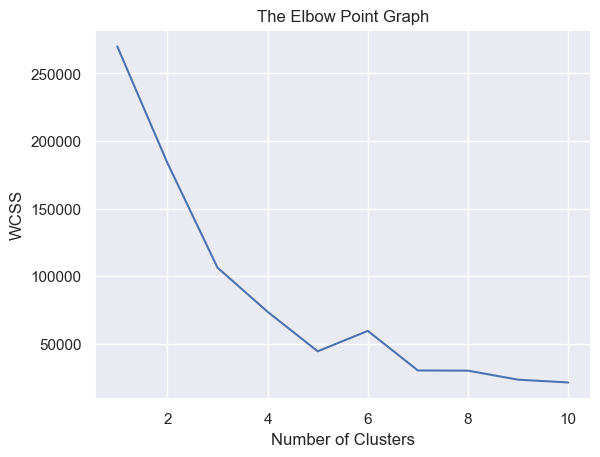

In [47]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Optimum Number of Clusters = 8

## Training the Model:

In [48]:

km = KMeans(n_clusters=8)
y_means = km.fit_predict(X)
print(y_means)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 1 0 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 6 1 1 6 1 1 1 1 1 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 7 6 7 6 7 3 7 3 7 6 7 3 7 3 7 3 7 3 7 6 7 3 7 6 7
 3 7 3 7 3 7 3 7 3 7 3 7 6 7 3 7 3 2 3 7 3 2 3 2 3 7 3 7 3 2 3 5 3 5 3 5 3
 5 3 2 3 5 3 2 3 5 3 5 3 5 3 5]


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [49]:
X[y_means==0] #the rows that are in cluster-0

array([[15, 81],
       [16, 77],
       [17, 76],
       [18, 94],
       [19, 72],
       [19, 99],
       [20, 77],
       [20, 79],
       [21, 66],
       [23, 98],
       [24, 73],
       [25, 73],
       [28, 82],
       [28, 61],
       [29, 87],
       [30, 73],
       [33, 92],
       [33, 81],
       [34, 73],
       [37, 75],
       [38, 92]], dtype=int64)

In [50]:
X[y_means==1] #the rows that are in cluster-1

array([[38, 35],
       [39, 36],
       [39, 61],
       [39, 65],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51],
       [46, 46],
       [46, 56],
       [46, 55],
       [47, 52],
       [47, 59],
       [48, 51],
       [48, 59],
       [48, 50],
       [48, 48],
       [48, 59],
       [48, 47],
       [49, 55],
       [49, 42],
       [50, 49],
       [50, 56],
       [54, 47],
       [54, 54],
       [54, 53],
       [54, 48],
       [54, 52],
       [54, 51],
       [54, 55],
       [54, 44],
       [54, 57],
       [54, 46],
       [57, 58],
       [57, 55],
       [58, 60]], dtype=int64)

In [51]:
X[y_means==2] #the rows that are in cluster-2

array([[ 85,  75],
       [ 87,  63],
       [ 87,  75],
       [ 88,  69],
       [101,  68],
       [103,  69]], dtype=int64)

In [52]:
X[y_means==3] #the rows that are in cluster-3

array([[ 71,  11],
       [ 71,   9],
       [ 73,   5],
       [ 73,   7],
       [ 74,  10],
       [ 75,   5],
       [ 77,  12],
       [ 78,  22],
       [ 78,  17],
       [ 78,  20],
       [ 78,  16],
       [ 78,   1],
       [ 78,   1],
       [ 81,   5],
       [ 85,  26],
       [ 86,  20],
       [ 87,  27],
       [ 87,  13],
       [ 87,  10],
       [ 88,  13],
       [ 88,  15],
       [ 93,  14],
       [ 97,  32],
       [ 98,  15],
       [ 99,  39],
       [101,  24],
       [103,  17],
       [103,  23],
       [113,   8],
       [120,  16],
       [126,  28],
       [137,  18]], dtype=int64)

In [53]:
X[y_means==4] #the rows that are in cluster-4

array([[15, 39],
       [16,  6],
       [17, 40],
       [18,  6],
       [19,  3],
       [19, 14],
       [20, 15],
       [20, 13],
       [21, 35],
       [23, 29],
       [24, 35],
       [25,  5],
       [28, 14],
       [28, 32],
       [29, 31],
       [30,  4],
       [33,  4],
       [33, 14],
       [34, 17],
       [37, 26],
       [39, 28]], dtype=int64)

In [54]:
X[y_means==5] #the rows that are in cluster-5

array([[ 93,  90],
       [ 97,  86],
       [ 98,  88],
       [ 99,  97],
       [103,  85],
       [113,  91],
       [120,  79],
       [126,  74],
       [137,  83]], dtype=int64)

In [55]:
X[y_means==6] #the rows that are in cluster-6

array([[54, 42],
       [54, 41],
       [58, 46],
       [59, 55],
       [59, 41],
       [60, 49],
       [60, 40],
       [60, 42],
       [60, 52],
       [60, 47],
       [60, 50],
       [61, 42],
       [61, 49],
       [62, 41],
       [62, 48],
       [62, 59],
       [62, 55],
       [62, 56],
       [62, 42],
       [63, 50],
       [63, 46],
       [63, 43],
       [63, 48],
       [63, 52],
       [63, 54],
       [64, 42],
       [64, 46],
       [65, 48],
       [65, 50],
       [65, 43],
       [65, 59],
       [67, 43],
       [67, 57],
       [67, 56],
       [67, 40],
       [69, 58],
       [70, 29],
       [71, 35],
       [72, 34],
       [76, 40],
       [77, 36],
       [79, 35]], dtype=int64)

In [56]:
X[y_means==7] #the rows that are in cluster-7

array([[69, 91],
       [70, 77],
       [71, 95],
       [71, 75],
       [71, 75],
       [72, 71],
       [73, 88],
       [73, 73],
       [74, 72],
       [75, 93],
       [76, 87],
       [77, 97],
       [77, 74],
       [78, 90],
       [78, 88],
       [78, 76],
       [78, 89],
       [78, 78],
       [78, 73],
       [79, 83],
       [81, 93],
       [86, 95],
       [87, 92],
       [88, 86]], dtype=int64)

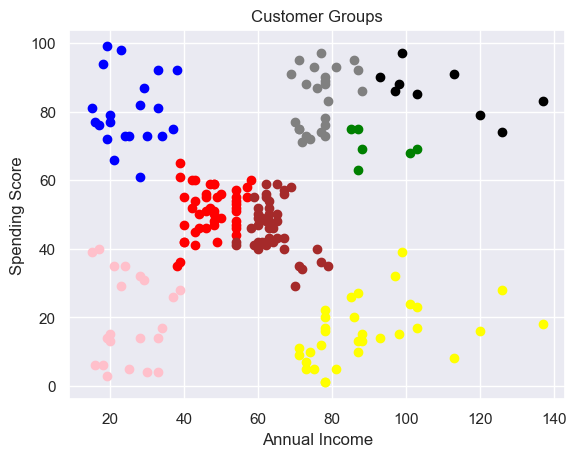

In [58]:
# Draw 8-Clusters Plot:

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],color='pink')
plt.scatter(X[y_means == 5,0],X[y_means == 5,1],color='black')
plt.scatter(X[y_means == 6,0],X[y_means == 6,1],color='brown')
plt.scatter(X[y_means == 7,0],X[y_means == 7,1],color='grey')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## K-Means on 3D Data:

In [59]:
from sklearn.datasets import make_blobs

# Define 8 centroids for 8 clusters
centroids = [
    (-5, -5, 5), (5, 5, -5), (3.5, -2.5, 4), (-2.5, 2.5, -4),
    (-3, 3, 3), (3, -3, -3), (-4, -4, 4), (4, 4, -4)
]
cluster_std = [1, 1, 1, 1, 1, 1, 1, 1]  # 8 standard deviations

# Generate 3D clusters
X, y = make_blobs(n_samples=200, cluster_std=cluster_std, centers=centroids, n_features=3, random_state=1)


In [60]:
X

array([[-3.16575452,  0.82580419, -3.17497018],
       [-4.82246719, -3.27828871,  3.374658  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 5.40465871, -1.3889433 ,  4.6590498 ],
       [-4.10839207, -3.54984449,  5.7653351 ],
       [-1.61509119,  1.62271848, -4.86778722],
       [ 5.31515939,  5.84616065, -5.85951594],
       [-3.32542929, -2.53910762,  4.5924728 ],
       [ 4.65614632,  5.04359686, -5.62000084],
       [-2.58450803,  2.20263812, -3.582698  ],
       [ 6.19891788,  5.18515642, -5.37528495],
       [ 3.1735005 , -3.84267579,  5.11438298],
       [ 3.76994186,  5.5505375 , -4.20719313],
       [-5.40232915, -3.54887706,  3.3050791 ],
       [ 2.22744124, -2.18645228,  4.50318481],
       [-4.8088472 , -3.44256055,  4.18103874],
       [-3.79726979,  3.28267571,  2.17390257],
       [ 3.56438286, -0.86217193, -3.785534  ],
       [-1.80731393,  2.76205806,  4.15528789],
       [-2.3789173 ,  3.9561217 ,  2.29415949],
       [ 3.38422765,  6.12141771, -4.591

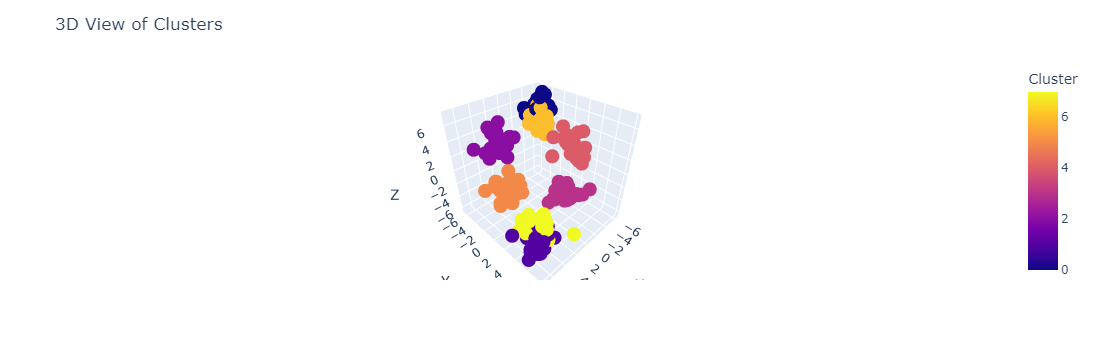

In [62]:
import plotly.express as px

# Create a 3D scatter plot with different colors for each cluster
fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y, labels={'color': 'Cluster'})
fig.update_layout(title='3D View of Clusters', scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))
fig.show()